# Affect of Wind, Rain, RF, and Temperature on Spread of Future Wildfires

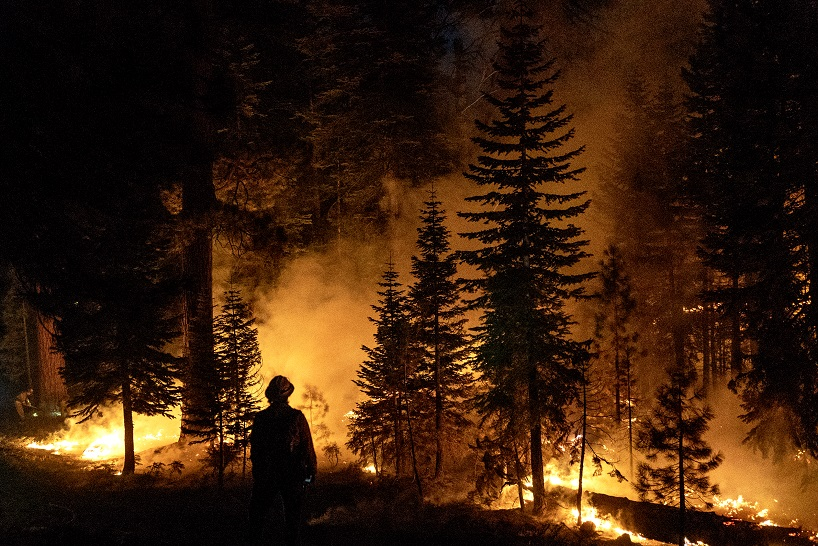

https://wildlife.ca.gov/portals/0/Images/Science_institute/Biodiversity/Wildfire/Donnell_fire.jpg

Project inspiration was drawn from this Article:

[1] Arif M, Alghamdi KK, Sahel SA, et al.(2021) Role of Machine Learning Algorithms in Forest Fire Management: A Literature Review. J Robotics Autom 5(1):212-226.
https://scholars.direct/Articles/robotics/jra-5-024.php?jid=robotics

[2] A Data Mining Approach to Predict Forest Fires using Meteorological Data: http://www3.dsi.uminho.pt/pcortez/fires.pdf

[3] An introduction to support vector regression svr https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

[4] SVM Regression https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

[5] Hypertuning the parameter https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

We wil be ultizing the forest fires Data set: https://archive.ics.uci.edu/ml/datasets/Forest+Fires. The dataset (forest.csv) is made available in this repository for reference.

The article below is an indepth qualitive analysis on the basis and exploration of this experiment. 
https://medium.com/@fatima.zohra.siddiqui/predicting-the-spread-of-forest-fires-5ff289088240

### Importing the Necessary Libraries and Defining Auxillary Functions

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Support Vector Machine Regression algorithm
from sklearn.svm import SVR
from sklearn import utils
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mae
# Cross Validation Object used for tuning hyperparamters of Regression Tasks
from sklearn.model_selection import RepeatedKFold

### Understading the Data 

The forestfires.csv contains model-specific info contains the following attribute information: [1]
1. temp - temperature in Celsius degrees: 2.2 to 33.30
2. RH - relative humidity in %: 15.0 to 100
3. wind - wind speed in km/h: 0.40 to 9.40
4. rain - outside rain in mm/m2 : 0.0 to 6.4
5. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

## 1.  Creating the data frame 

In [5]:
data = pd.read_csv("/Users/fatimasiddiqui/Documents/Projects/predictWildfiresSpread/forestfires.csv")
# Reading the first five rows
data.head()
# Selecting the features we want to use for regression
cdf = data[['temp','RH','wind','rain','area']]
cdf.columns.name = 'Forest Fire'
cdf

Forest Fire  temp  RH  wind  rain   area
0             8.2  51   6.7   0.0   0.00
1            18.0  33   0.9   0.0   0.00
2            14.6  33   1.3   0.0   0.00
3             8.3  97   4.0   0.2   0.00
4            11.4  99   1.8   0.0   0.00
..            ...  ..   ...   ...    ...
512          27.8  32   2.7   0.0   6.44
513          21.9  71   5.8   0.0  54.29
514          21.2  70   6.7   0.0  11.16
515          25.6  42   4.0   0.0   0.00
516          11.8  31   4.5   0.0   0.00

[517 rows x 5 columns]

## 2. Cleaning, Preprocessing and Sorting the Data 

Fire occurence represents the Forest Fire column and burnt area of the forest represent the area colnum from the tabel above in Section 1. 

Text(0, 0.5, 'burnt area of the forest (ha)')

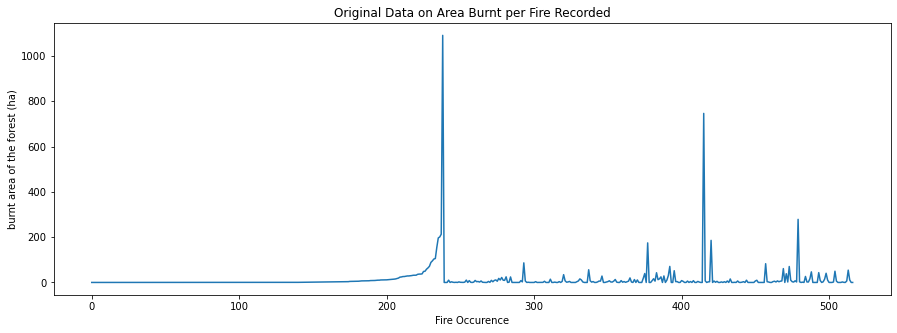

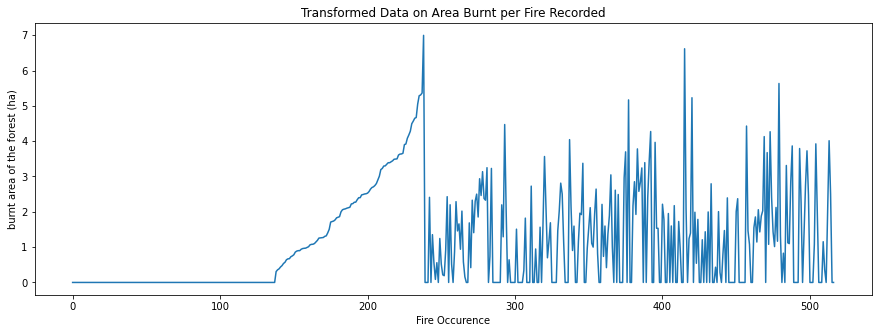

In [8]:
# New dataframe will contain our for predictors
features = cdf[['temp','RH','wind','rain']]

Y = cdf['area'].to_numpy()

plt.figure(figsize=(15,5))
plt.plot(Y)
plt.title("Original Data on Area Burnt per Fire Recorded")
plt.xlabel('Fire Occurence')
plt.ylabel('burnt area of the forest (ha)')

# Transform the array data values with the ln(x+1) function
Y = np.log(Y+1)

plt.figure(figsize=(15,5))
plt.plot(Y)
plt.title("Transformed Data on Area Burnt per Fire Recorded")
plt.xlabel('Fire Occurence')
plt.ylabel('burnt area of the forest (ha)')

The graphs below showcase the frequncy of wilfires as per the area of forest they burnt. These graphs represent a qualitive understading of the general sizes of wildfires in the Portugal forest region. 

Text(0.5, 1.0, 'Original Data on Area Burnt')

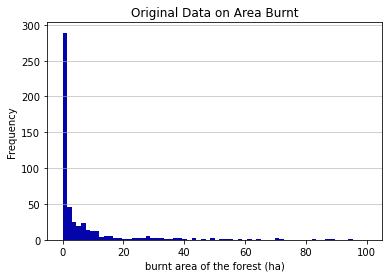

In [9]:
features = cdf[['temp','RH','wind','rain']]

Y = cdf['area'].to_numpy()

plt.hist(Y, bins='auto', range=[0, 100], color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('burnt area of the forest (ha)')
plt.ylabel('Frequency')
plt.title('Original Data on Area Burnt')

Text(0.5, 1.0, 'Transsformed Data on Area Burnt')

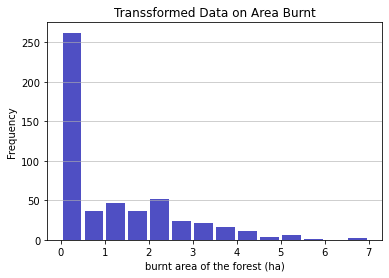

In [10]:
# Transform the array data values with the ln(x+1) function
Y = np.log(Y+1)

n, bins, patches = plt.hist(Y, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('burnt area of the forest (ha)')
plt.ylabel('Frequency')
plt.title('Transsformed Data on Area Burnt')

## 3. Forming the training and test data

Splitting the data into testing and training sets provides the model with an out-of-sample accuracy with 80% of the entire dataset will be used for training and 20% for testing.

In [27]:
# Standardize the data in X then reassign it to the variable X 
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(features)
X = pd.DataFrame(x_scaled)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [68]:
new = pd.DataFrame(Y_train)
new

0
0    0.000000
1    2.020222
2    3.300640
3    0.000000
4    2.057963
..        ...
408  0.000000
409  1.430311
410  0.000000
411  3.791436
412  1.261298

[413 rows x 1 columns]

In [69]:
new2 = pd.DataFrame(Y_test)
new2

0
0    0.000000
1    1.166271
2    0.418710
3    0.000000
4    0.000000
..        ...
99   0.000000
100  0.357674
101  2.214846
102  2.260721
103  1.845300

[104 rows x 1 columns]

## 4. Support Vector Regression

SVR objective function minimizes the coefficients through the l2 norm of the coefficient factor - rather than minimizing the sum of squared error like linear regression models. The error term is handled as a constraint setting the absolute error less than or equal to a user specified error, epsilon. Wherein, we can tune the epsilon as required to find an acceptable hyperplane to fit the data. [3] [4]

In [12]:
svmRBF = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svmRBF.fit(X_train, Y_train) #[4]

svmPOLY = SVR(kernel="poly", C=100, gamma=0.1, epsilon=0.1)
svmPOLY.fit(X_train, Y_train) #[4]
 
svmSigmoid = SVR(kernel="sigmoid", C=100, gamma=0.1, epsilon=0.1)
svmSigmoid.fit(X_train, Y_train) #[4]

SVR(C=100, gamma=0.1, kernel='sigmoid')

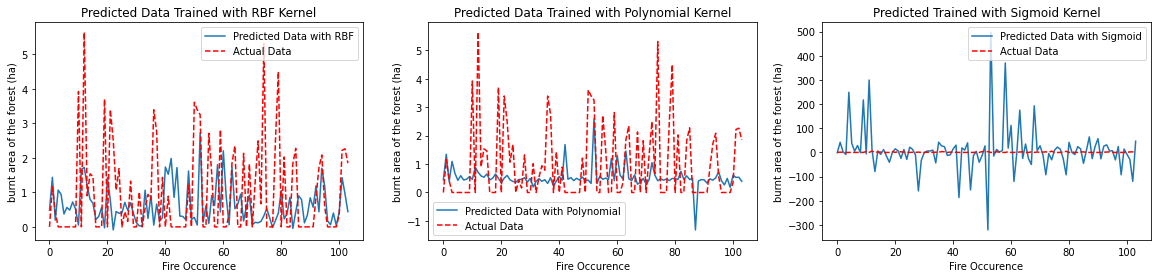

In [70]:
# Predict using our testset
yhatRBF = svmRBF.predict(X_test)
yhatPOLY = svmPOLY.predict(X_test)
yhatSigmoid = svmSigmoid.predict(X_test)

fig, axs = plt.subplots(1,3, figsize=(20, 4), squeeze = False)
#axs[0,0].plot(Y_test) 
#axs[0,0].set_title("Real Data", y=1)
axs[0,0].plot(yhatRBF) 
axs[0,0].plot(Y_test, 'r--')
axs[0,0].set_title("Predicted Data Trained with RBF Kernel", y=1)
axs[0,0].set_xlabel('Fire Occurence')
axs[0,0].set_ylabel('burnt area of the forest (ha)')
axs[0,0].legend(['Predicted Data with RBF', 'Actual Data'])

axs[0,1].plot(yhatPOLY) 
axs[0,1].plot(Y_test, 'r--')
axs[0,1].set_title("Predicted Data Trained with Polynomial Kernel", y=1)
axs[0,1].set_xlabel('Fire Occurence')
axs[0,1].set_ylabel('burnt area of the forest (ha)')
axs[0,1].legend(['Predicted Data with Polynomial', 'Actual Data'])

axs[0,2].plot(yhatSigmoid) 
axs[0,2].plot(Y_test, 'r--')
axs[0,2].set_title("Predicted Trained with Sigmoid Kernel", y=1)
axs[0,2].set_xlabel('Fire Occurence')
axs[0,2].set_ylabel('burnt area of the forest (ha)')
axs[0,2].legend(['Predicted Data with Sigmoid', 'Actual Data'])

## Defining a Metric 

As can be seen by the above graphs, a majority of the data points are not captured by any of three models. To account for the errors larger than epsilon, an appropriate regularization parameter, C , will be selected through Grid Search. [3] 

The metric we will use to score the choice of C will be the % of data points within Epsilon, otherwise defined as our margin of error. This is will be measured through Mean Absolute Error (MAE) as its score will vary with the choice of C. 

With the current C of 100, we find that the MAE for each of three graphs above are:

In [29]:
# Metric used is Mean Absolute Error (MAE)
# We compare againts Y_test because we are evaluting how well our model predicts the known data that was originally splitted in 3
maeRBF = mae(Y_test, yhatRBF)
maePOLY = mae(Y_test, yhatPOLY)
maeSigmoid = mae(Y_test, yhatSigmoid)

print("RBF Kernal:     MAE:", maeRBF, " Score(R2): ", svmRBF.score(X_test, yhatRBF) )
print("Poly Kernal:    MAE:", maePOLY, " Score(R2): ", svmPOLY.score(X_test, yhatPOLY) )
print("Sigmoid Kernal: MAE:", maeSigmoid, " Score(R2): ", svmSigmoid.score(X_test, yhatSigmoid) )

RBF Kernal:     MAE: 1.0643737551057972  Score(R2):  1.0
Poly Kernal:    MAE: 0.9987238480454358  Score(R2):  1.0
Sigmoid Kernal: MAE: 50.243081971571215  Score(R2):  1.0


##  5. Hyperparameter Tuning with GridSearch

The hyperparamter C will be tuned using Grid Search. As C increases, the tolerance for points ouside epsilon increases. Using GridSearch, we determine the optimal value for C. The value will be scored using MAE. This will be performed on all three kernal defined above to find the most optimal model.  

Below, we have determined the most optimal C score through manually tuning three hyperparamteres C, gamma, and epsilon

In [20]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [100, 80, 70, 40],'gamma':[0.4, 0.3, 0.2, 0.1], 'epsilon':[0.1, 0.2, 0.3, 0.4]}


svr = SVR()
cv = RepeatedKFold(n_splits=1, n_repeats=4, random_state=2)
svr_cv = GridSearchCV(svr,parameters)
svr_cv.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv.best_params_)
print("accuracy :",svr_cv.best_score_)
yhat_svr_cv = svr_cv.predict(X_test)
print(svr_cv.score(X_test,Y_test), mae(Y_test, yhat_svr_cv))

tuned hyperparamters  :(best parameters)  {'C': 40, 'epsilon': 0.4, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : -0.13706254051391786
-0.14969352437330952 1.0621675427139574


In [12]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 30, 20],'gamma':[0.7, 0.5, 0.4], 'epsilon':[0.1, 0.2, 0.3]}


svr2 = SVR()
svr_cv2 = GridSearchCV(svr2,parameters)
svr_cv2.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv2.best_params_)
print("accuracy :",svr_cv2.best_score_)
yhat_svr_cv2 = svr_cv2.predict(X_test)
print(svr_cv2.score(X_test,Y_test), mae(Y_test, yhat_svr_cv2))

tuned hyperparamters  :(best parameters)  {'C': 20, 'epsilon': 0.3, 'gamma': 0.4, 'kernel': 'rbf'}
accuracy : -0.24445324119183778
-0.23947739607575613 1.0920260809521447


In [11]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 41, 42],'gamma':[0.1, 0.12, 0.14], 'epsilon':[0.9, 0.92, 0.98]}


svr3 = SVR()
svr_cv3 = GridSearchCV(svr3,parameters)
svr_cv3.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv3.best_params_)
print("accuracy :",svr_cv3.best_score_)
yhat_svr_cv3 = svr_cv3.predict(X_test)
print(svr_cv3.score(X_test,Y_test), mae(Y_test, yhat_svr_cv3))

tuned hyperparamters  :(best parameters)  {'C': 40, 'epsilon': 0.98, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : -0.015366590078768394
-0.006366994834430484 1.0903137542502543


In [30]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 40.2, 40.5],'gamma':[0.1, 0.08, 0.05], 'epsilon':[0.9, 0.98, 1.0]}


svr4 = SVR()
svr_cv4 = GridSearchCV(svr4,parameters)
svr_cv4.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv4.best_params_)
print("accuracy :",svr_cv4.best_score_)
yhat_svr_cv4 = svr_cv4.predict(X_test)
print(svr_cv4.score(X_test,Y_test), mae(Y_test, yhat_svr_cv4))

tuned hyperparamters  :(best parameters)  {'C': 40, 'epsilon': 1.0, 'gamma': 0.08, 'kernel': 'rbf'}
accuracy : -0.012473741456748155
-0.0021839033476560576 1.0911797774108842


In [27]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 40.2, 40.5],'gamma':[0.1, 0.08, 0.4], 'epsilon':[0.1, 0.2, 0.3, 0.4]}


svr5 = SVR()
svr_cv5 = GridSearchCV(svr5,parameters)
svr_cv5.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv5.best_params_)
print("accuracy :",svr_cv5.best_score_)
yhat_svr_cv5 = svr_cv5.predict(X_test)
print(svr_cv7.score(X_test,Y_test), mae(Y_test, yhat_svr_cv5))

tuned hyperparamters  :(best parameters)  {'C': 40.2, 'epsilon': 0.4, 'gamma': 0.08, 'kernel': 'rbf'}
accuracy : -0.13167970017968983
-0.12114921458726169 1.053594118074843


In [13]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 40.1, 40.2],'gamma':[0.09, 0.085, 0.080], 'epsilon':[0.40, 0.42, 0.44]}


svr7 = SVR()
svr_cv7 = GridSearchCV(svr7,parameters)
svr_cv7.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv7.best_params_)
print("accuracy :",svr_cv7.best_score_)
yhat_svr_cv7 = svr_cv7.predict(X_test)
print(svr_cv7.score(X_test,Y_test), mae(Y_test, yhat_svr_cv7))

tuned hyperparamters  :(best parameters)  {'C': 40.1, 'epsilon': 0.44, 'gamma': 0.08, 'kernel': 'rbf'}
accuracy : -0.11931765489969333
-0.12114921458726169 1.0482912299745715


In [11]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40, 40.1, 40.05],'gamma':[0.08, 0.075, 0.070], 'epsilon':[0.44, 0.45, 0.47]}


svr8 = SVR()
svr_cv8 = GridSearchCV(svr8,parameters)
svr_cv8.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv8.best_params_)
print("accuracy :",svr_cv8.best_score_)
yhat_svr_cv8 = svr_cv8.predict(X_test)
print(svr_cv8.score(X_test,Y_test), mae(Y_test, yhat_svr_cv8))

tuned hyperparamters  :(best parameters)  {'C': 40.05, 'epsilon': 0.47, 'gamma': 0.07, 'kernel': 'rbf'}
accuracy : -0.10833501695753836
-0.10643188423500116 1.0432497688165816


In [14]:
parameters = {'kernel':('rbf','poly','sigmoid'),'C': [40.05,40.04,40.03 ],'gamma':[0.030, 0.05, 0.04], 'epsilon':[0.49, 0.48, 0.47]}


svr9 = SVR()
svr_cv9 = GridSearchCV(svr9,parameters)
svr_cv9.fit(X_train, (Y_train))
print("tuned hyperparamters  :(best parameters) ",svr_cv9.best_params_)
print("accuracy :",svr_cv9.best_score_)
yhat_svr_cv9 = svr_cv9.predict(X_test)
print(svr_cv9.score(X_test,Y_test), mae(Y_test, yhat_svr_cv9))

tuned hyperparamters  :(best parameters)  {'C': 40.05, 'epsilon': 0.49, 'gamma': 0.03, 'kernel': 'rbf'}
accuracy : -0.07441579456829875
-0.09248282886870451 1.032299457165076


## Choice of parameters
After review the mae and the scores of each of the hyperparamter tunings, it was found that svr4 had the minimum Score and MAE. 

Score: -0.0021839033476560576

MAE: 1.0911797774108842

## Plot with the optimal hyperparameters

Text(0, 0.5, 'burnt area of the forest (ha)')

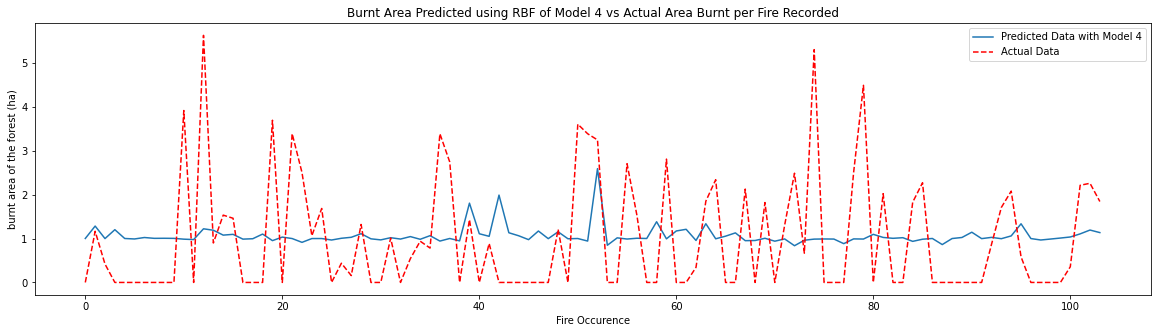

In [31]:
# Plotting the Model 4 against the original Test Data 
plt.figure(figsize=(20,5))
plt.plot(yhat_svr_cv4)
plt.plot(Y_test, 'r--')
plt.legend(['Predicted Data with Model 4', 'Actual Data'])
plt.title("Burnt Area Predicted using RBF of Model 4 vs Actual Area Burnt per Fire Recorded")
plt.xlabel('Fire Occurence')
plt.ylabel('burnt area of the forest (ha)')

Text(0, 0.5, 'burnt area of the forest (ha)')

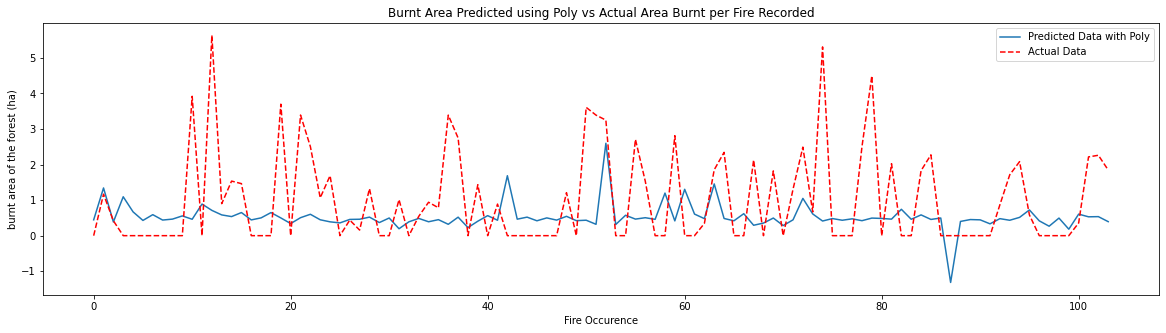

In [33]:
# NEW 
plt.figure(figsize=(20,5))
plt.plot(yhatPOLY)
plt.plot(Y_test, 'r--')
plt.legend(['Predicted Data with Poly', 'Actual Data'])
plt.title("Burnt Area Predicted using Poly vs Actual Area Burnt per Fire Recorded")
plt.xlabel('Fire Occurence')
plt.ylabel('burnt area of the forest (ha)')

Text(0, 0.5, 'burnt area of the forest (ha)')

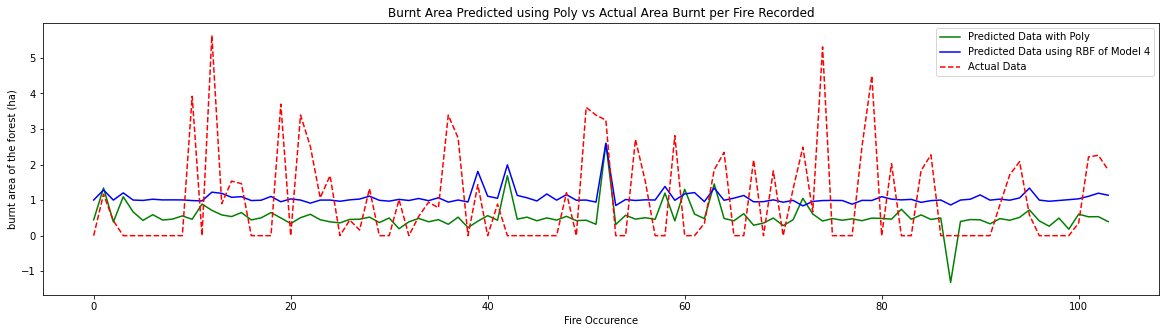

In [55]:
# both the predictors and the actual data in one graph to compare
plt.figure(figsize=(20,5))
plt.plot(yhatPOLY, 'g')
plt.plot(yhat_svr_cv4, 'b')
plt.plot(Y_test, 'r--')
plt.legend(['Predicted Data with Poly','Predicted Data using RBF of Model 4', 'Actual Data'])
plt.title("Burnt Area Predicted using Poly vs Actual Area Burnt per Fire Recorded")
plt.xlabel('Fire Occurence')
plt.ylabel('burnt area of the forest (ha)')

Text(0.5, 1.0, 'Frequency of Burnt Area Predicted vs Actually Burnt')

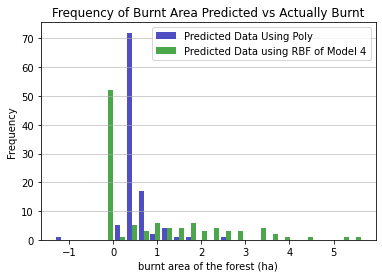

In [38]:
n, bins, patches = plt.hist([yhatPOLY, Y_test], bins='auto', color=['#0504aa','#008000'],
                            alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(Y_test, bins='auto', color='#008000',
                          #  alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('burnt area of the forest (ha)')
plt.ylabel('Frequency')
plt.legend(['Predicted Data Using Poly','Predicted Data using RBF of Model 4','Actual Data'])
plt.title('Frequency of Burnt Area Predicted vs Actually Burnt')